In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import cv2
print(cv2.__version__)
import numpy as np
# import all the packages needed for Hough Transform
from skimage import color
from skimage.feature import canny
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.draw import circle_perimeter, circle
import scipy as sc
import statistics as stats
import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"

3.4.1


In [14]:
#Load start and finish frames for first and last trial

path = r"C:\Users\Daniellab\Desktop\Jorge_Analysis\Centroids_Final"

out_path = r"C:\Users\Daniellab\Desktop\Jorge_Analysis\Centroids_Final"

# outpath_fig_ = r"C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Motion_Analysis\HeatMap\EntireTrial"

# out_path_fig_r = r"C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Motion_Analysis\Radial_Plot"

# out_path_fig_t = r"C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Motion_Analysis\Theta_Plot"

# all_path = r"C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Motion_Analysis\First_Last_Centroids\ActuallyAllTrials"
video_path = r"C:\Users\Daniellab\Desktop\Jorge_Analysis\Videos"

file_list = glob.glob(path + "\\" + '*centroid*.csv')


In [8]:
#Sort the moths into either first or last trial 

# Trial = ['First', 'Last']

# for Trial in Trial:
        
# Trial_list = glob.glob(path + "\\" + "Final_position_centroid_method_" + Trial + '*c-3*.csv')



df1=[]
df2=[]
df3=[]
df4=[]
df5=[]
df6=[]

ctr = 0
for fpath in file_list:
    df = pd.read_csv(fpath)
    trialNum= df.index
    FrameNumber = df['FrameNumber']
    fname = df['Name']
    names = [fname[0]]*len(trialNum)
#     t_type = [Trial]*len(trialNum)
    X_position = df['X_position']
    Y_position = df['Y_position']

    df1.extend(FrameNumber)
    df2.extend(trialNum)
    df3.extend(names)
    df4.extend(X_position)
    df5.extend(Y_position)
#     df6.extend(t_type)
    ctr+=1
    print(ctr)

new_df = (pd.DataFrame({
                        'FrameNumber': df1, 'trialNum': df2, 'name' : df3, 'X_position' : df4, 'Y_position' : df5}))
# print(Trial + '\t' + "has a total of" + '\t'+ str(ctr) + '\t' + "moths")
new_df.to_csv(out_path + "\\" + "_Allmoths.csv")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [10]:
import glob


dFrame = pd.DataFrame()

file = glob.glob(out_path + "\\" + '*Allmoths.csv')

for file in file:
    print(file)
    df = pd.read_csv(file)
    dFrame = dFrame.append(df)
dFrame.to_csv(out_path  + "\\" + "First_Last_Visit_EveryMoth.csv")

C:\Users\Daniellab\Desktop\Jorge_Analysis\Centroids_Final\_Allmoths.csv


In [12]:
FL_df = pd.read_csv(out_path + "\\" + 'First_Last_Visit_Everymoth.csv')
 
nam_51 = FL_df.name.unique()
len(nam_51)

720

In [15]:
nam_51[0]

'Experimental_1_150214'

In [16]:
rad_n = []
rad_nf = []
rad_nan_lo = [] 
rad_nan_hi = []
theta_0 = []
theta_f = []

for name in nam_51[0:1]:
    print(name)
    
    video_list = glob.glob(video_path + '\\' + name[0] + '*.mp4')
    video_list
    vid = cv2.VideoCapture(video_list[0])

    width = vid.get(3)
    height = vid.get(4)
    
    ret = vid.set(1,1)
    
    
    ret, frame = vid.read(1)

    # plt.imshow(frame)

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5,5), 0)

    edges = canny(blurred, sigma = 5)

    hough_radii = np.arange(50, 150, 1)
    hough_res = hough_circle(edges, hough_radii)
    accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                               total_num_peaks=1)
    print(cx[0], cy[0])
    # read out points & subtract and plot for a window of frames


    x_low = FL_df[(FL_df.name == name) & (FL_df.name.str.contains('L0.1'))].X_position - cx[0]

    y_low = FL_df[(FL_df.name == name) & (FL_df.name.str.contains('L0.1'))].Y_position - cy[0]

    x_high = FL_df[(FL_df.name == name) & (FL_df.name.str.contains('L50'))].X_position - cx[0]

    y_high = FL_df[(FL_df.name == name) & (FL_df.name.str.contains('L50'))].Y_position - cy[0]

    x_000 = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('First'))].X_position - cx[0]

    y_000 = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('First'))].Y_position - cy[0]

    x_fff = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('Last'))].X_position - cx[0]

    y_fff = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('Last'))].Y_position - cy[0]


    # find out vector for each frame
    
    theta_first = list(np.arctan2(y_000, x_000)*180/np.pi)

    rad_nan_low = np.linalg.norm([x_low,y_low], axis = 0)/radii[0]


    theta_last = list(np.arctan2(y_fff, x_fff)*180/np.pi) 
    
    rad_nan_high = np.linalg.norm([x_high,y_high], axis = 0)/radii[0]



    rad_nan0  = np.linalg.norm([x_000,y_000], axis = 0)/radii[0]
    


    rad_nanf = np.linalg.norm([x_fff,y_fff], axis = 0)/radii[0]

    rad_n.extend(list(rad_nan0))
    rad_nf.extend(list(rad_nanf))
    rad_nan_hi.extend(list(rad_nan_high))
    rad_nan_lo.extend(list(rad_nan_low))
    theta_0.extend(theta_first)
    theta_f.extend(theta_last)

Experimental_1_150214
334 228


AttributeError: 'DataFrame' object has no attribute 'Visit'

In [7]:
# rad_nan_lo = [] 
# rad_nan_hi = []
# theta_lo = []
# theta_hi = []

# for name in nam_51:
#     print(name)
#     video_path = r"C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Videos\All_videos_used_for_analysis"
#     video_list = glob.glob(video_path + '\\' + name + '*.mp4')
#     video_list
#     vid = cv2.VideoCapture(video_list[0])

#     width = vid.get(3)
#     height = vid.get(4)
    
#     ret = vid.set(1,1)
#     print(ret)
    
#     ret, frame = vid.read(1)

#     # plt.imshow(frame)

#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     blurred = cv2.GaussianBlur(gray, (5,5), 0)

#     edges = canny(blurred, sigma = 5)

#     hough_radii = np.arange(50, 150, 1)
#     hough_res = hough_circle(edges, hough_radii)
#     accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
#                                                total_num_peaks=1)
    
#     # read out points & subtract and plot for a window of frames


#     x_low = dFrame[(dFrame.name == name) & (dFrame.name.str.contains('L0.1'))].X_position - cx[0]

#     y_low = dFrame[(dFrame.name == name) & (dFrame.name.str.contains('L0.1'))].Y_position - cy[0]

#     x_high = dFrame[(dFrame.name == name) & (dFrame.name.str.contains('L50'))].X_position - cx[0]

#     y_high = dFrame[(dFrame.name == name) & (dFrame.name.str.contains('L50'))].Y_position - cy[0]

    

#     # find out vector for each frame
    
#     theta_low = list(np.arctan2(y_low, x_low)*180/np.pi)

#     rad_nan_low = np.linalg.norm([x_low,y_low], axis = 0)/radii[0]


#     theta_high = list(np.arctan2(y_high, x_high)*180/np.pi) 
    
#     rad_nan_high = np.linalg.norm([x_high,y_high], axis = 0)/radii[0]



    

    
#     rad_nan_hi.extend(list(rad_nan_high))
#     rad_nan_lo.extend(list(rad_nan_low))
#     theta_lo.extend(theta_low)
#     theta_hi.extend(theta_high)

In [8]:
rad_list_FL = []
rad_list_FL.extend(rad_n)
rad_list_FL.extend(rad_nf)
theta_list_FL = []
theta_list_FL.extend(theta_0)
theta_list_FL.extend(theta_f)
theta_list_FL
theta_positive_FL = []
for element in theta_list_FL:
    if element <= 0:
        element = element + 360
    else:
        element = element
    theta_positive_FL.append(element)

In [9]:
# rad_list = []
# rad_list.extend(rad_nan_lo)
# rad_list.extend(rad_nan_hi)
# theta_list = []
# theta_list.extend(theta_lo)
# theta_list.extend(theta_hi)
# theta_list
# theta_positive = []
# for element in theta_list:
#     if element <= 0:
#         element = element + 360
#     else:
#         element = element
#     theta_positive.append(element)

In [10]:
theta_list_FL[6], theta_positive_FL[6]

(127.39445462750092, 127.39445462750092)

In [11]:
len(rad_list_FL), len(theta_positive_FL)

(144030, 144030)

In [12]:
label = {'0.1': 'low', '50': 'high'}
FL_df['lightLevel'] = FL_df['name'].map(lambda x : "LOW" if "0.1" in x else "HIGH" if "50" in x else "")
FL_df['Radial_Length'] = pd.Series(rad_list_FL, index=FL_df.index)
FL_df['Theta'] = pd.Series(theta_positive_FL, index=FL_df.index)
# FL_df.to_csv(out_path  + "\\" + "First_Last_Visit_EveryMoth.csv")

In [13]:
# label = {'0.1': 'low', '50': 'high'}
# dFrame['lightLevel'] = dFrame['name'].map(lambda x : "LOW" if "0.1" in x else "HIGH" if "50" in x else "")
# dFrame['Radial_Length'] = pd.Series(rad_list, index=dFrame.index)
# dFrame['Theta'] = pd.Series(theta_positive, index=dFrame.index)
# # dFrame.to_csv(all_path  + "\\" + "EntireTrial_AllMoths.csv")

In [14]:
FL_df.head()

,Unnamed: 0,Unnamed: 0.1,FrameNumber,trialNum,name,X_position,Y_position,Visit,lightLevel,Radial_Length,Theta
0,0,0,20372,0,L0.1_c-3_m10,NaN,NaN,First,LOW,NaN,NaN
1,1,1,20373,1,L0.1_c-3_m10,NaN,NaN,First,LOW,NaN,NaN
2,2,2,20374,2,L0.1_c-3_m10,NaN,NaN,First,LOW,NaN,NaN
3,3,3,20375,3,L0.1_c-3_m10,NaN,NaN,First,LOW,NaN,NaN
4,4,4,20376,4,L0.1_c-3_m10,80.775759,407.542261,First,LOW,3.946745,142.712626


In [15]:
# mean_radial_length_low_FL = []
# mean_radial_length_high_FL = []
# standard_deviation_low_FL = []
# standard_deviation_high_FL = []
# for name in nam_51:
#     radial_list_FL = FL_df[(FL_df.name == name)].Radial_Length
#     useful_radial_list_FL = list(radial_list_FL[~np.isnan(radial_list_FL)])
#     if name.startswith('L0.1') & np.any(useful_radial_list_FL):
#         mrll_FL = sum(useful_radial_list_FL)/len(useful_radial_list_FL)
#         stdl_FL = np.std(useful_radial_list_FL)
#         mean_radial_length_low_FL.append(mrll_FL)
#         standard_deviation_low_FL.append(stdl_FL)
#     elif name.startswith('L50')  & np.any(useful_radial_list_FL):
#         mrlh_FL = sum(useful_radial_list_FL)/len(useful_radial_list_FL)
#         stdh_FL = np.std(useful_radial_list_FL)
#         mean_radial_length_high_FL.append(mrlh_FL)
#         standard_deviation_high_FL.append(stdh_FL)
# len(nam_51), len(mean_radial_length_low_FL), len(mean_radial_length_high_FL), len(standard_deviation_high_FL)

In [16]:
# mean_radial_length_low = []
# mean_radial_length_high = []
# standard_deviation_low = []
# standard_deviation_high = []
# for name in nam_51:
#     print(name)
#     radial_list = dFrame[(dFrame.name == name)].Radial_Length
#     useful_radial_list = list(radial_list[~np.isnan(radial_list)])
#     if name.startswith('L0.1') & np.any(useful_radial_list):
#         print(name)
#         mrll = sum(useful_radial_list)/len(useful_radial_list)
#         stdl = np.std(useful_radial_list)
#         mean_radial_length_low.append(mrll)
#         standard_deviation_low.append(stdl)
#     elif name.startswith('L50')  & np.any(useful_radial_list):
#         mrlh = sum(useful_radial_list)/len(useful_radial_list)
#         stdh = np.std(useful_radial_list)
#         mean_radial_length_high.append(mrlh)
#         standard_deviation_high.append(stdh)
# len(nam_51), len(mean_radial_length_low), len(mean_radial_length_high), len(standard_deviation_high)

In [17]:
# median_radial_length_low_FL = []
# median_radial_length_high_FL = []
# iqr_low_FL = []
# iqr_high_FL = []   
# for name in nam_51:
#     radial_list_FL = FL_df[(FL_df.name == name)].Radial_Length
#     useful_radial_list_FL = list(radial_list_FL[~np.isnan(radial_list_FL)])
#     if name.startswith('L0.1') & np.any(useful_radial_list_FL):
#         med_l_FL = stats.median(useful_radial_list_FL)
#         iqr_l_FL = sc.stats.iqr(useful_radial_list_FL)
#         median_radial_length_low_FL.append(med_l_FL)
#         iqr_low_FL.append(iqr_l_FL)
#     elif name.startswith('L50')  & np.any(useful_radial_list_FL):
#         med_h_FL = stats.median(useful_radial_list_FL)
#         median_radial_length_high_FL.append(med_h_FL)
#         iqr_h_FL = sc.stats.iqr(useful_radial_list_FL)
#         iqr_high_FL.append(iqr_h_FL)
# len(nam_51), len(median_radial_length_low_FL), len(median_radial_length_high_FL), len(iqr_high_FL)

In [18]:
# median_radial_length_low = []
# median_radial_length_high = []
# iqr_low = []
# iqr_high = []   
# for name in nam_51:
#     radial_list = dFrame[(dFrame.name == name)].Radial_Length
#     useful_radial_list = list(radial_list[~np.isnan(radial_list)])
#     if name.startswith('L0.1') & np.any(useful_radial_list):
#         med_l = stats.median(useful_radial_list)
#         iqr_l = sc.stats.iqr(useful_radial_list)
#         median_radial_length_low.append(med_l)
#         iqr_low.append(iqr_l)
#     elif name.startswith('L50')  & np.any(useful_radial_list):
#         med_h = stats.median(useful_radial_list)
#         median_radial_length_high.append(med_h)
#         iqr_h = sc.stats.iqr(useful_radial_list)
#         iqr_high.append(iqr_h)
#     else:
#         print(name)
# len(nam_51), len(median_radial_length_low), len(median_radial_length_high), len(iqr_high)

In [19]:
# radial_length_low = []
# radial_length_high = []
# for name in nam_51:
#     radial_list = dFrame[(dFrame.name == name)].Radial_Length
#     if name.startswith('L0.1') & np.any(useful_radial_list):
#         radial_list_low = dFrame[(dFrame.name == name)].Radial_Length
#         useful_radial_list_low = list(radial_list_low[~np.isnan(radial_list_low)])
#         radial_length_low.append(useful_radial_list_low)
#     elif name.startswith('L50') & np.any(useful_radial_list):
#         radial_list_high = dFrame[(dFrame.name == name)].Radial_Length
#         useful_radial_list_high = list(radial_list_high[~np.isnan(radial_list_high)])
#         radial_length_high.append(useful_radial_list_high)

In [20]:
median_radial_length_low_first = []
median_radial_length_high_first = []
iqr_lowf= []
iqr_highf = []   
median_radial_length_low_last = []
median_radial_length_high_last = []
iqr_lowl= []
iqr_highl = [] 
i= 0
for name in nam_51:
    radial_list_first = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('First'))].Radial_Length
    useful_radial_list_first = list(radial_list_first[~np.isnan(radial_list_first)])
    radial_list_last = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('Last'))].Radial_Length
    useful_radial_list_last = list(radial_list_last[~np.isnan(radial_list_last)])
    if name.startswith('L0.1'):
        
        if np.any(useful_radial_list_first) & np.any(useful_radial_list_last):
            i+=1
            med_lf = stats.median(useful_radial_list_first)
            iqr_lf = sc.stats.iqr(useful_radial_list_first)
            median_radial_length_low_first.append(med_lf)
            iqr_lowf.append(iqr_lf)
            med_ll = stats.median(useful_radial_list_last)
            iqr_ll = sc.stats.iqr(useful_radial_list_last)
            median_radial_length_low_last.append(med_ll)
            iqr_lowl.append(iqr_ll)
        elif np.any(useful_radial_list_first):
            print(name)
            med_lf = stats.median(useful_radial_list_first)
            iqr_lf = sc.stats.iqr(useful_radial_list_first)
            median_radial_length_low_first.append(med_lf)
    elif name.startswith('L50'):
        if np.any(useful_radial_list_first) & np.any(useful_radial_list_last):
            med_hf = stats.median(useful_radial_list_first)
            median_radial_length_high_first.append(med_hf)
            iqr_hf = sc.stats.iqr(useful_radial_list_first)
            iqr_highf.append(iqr_hf)
            med_hl = stats.median(useful_radial_list_last)
            median_radial_length_high_last.append(med_hl)
            iqr_hl = sc.stats.iqr(useful_radial_list_last)
            iqr_highl.append(iqr_hl)
        elif np.any(useful_radial_list_first):
            print(name)
            med_hf = stats.median(useful_radial_list_first)
            median_radial_length_high_first.append(med_hf)
            iqr_hf = sc.stats.iqr(useful_radial_list_first)
            iqr_highf.append(iqr_hf)
len(nam_51), len(median_radial_length_low_first), len(median_radial_length_low_last), len(median_radial_length_high_first), len(median_radial_length_high_last)

L0.1_c-3_m24
L0.1_c-3_m39
L50_c-3_m24
L50_c-3_m25


(55, 29, 27, 26, 24)

In [21]:
median_radial_length_low_last, median_radial_length_low_first

([2.7827764166028945,
  2.9236290862031895,
  2.0729367310739706,
  2.0508760793575225,
  1.8978276187010663,
  2.1729611336816435,
  1.9938556516966681,
  1.8854131743686442,
  2.781012354826065,
  2.451732318775496,
  1.35559164928676,
  1.8324404924171074,
  1.8606876862972612,
  3.3439868573080513,
  2.072854523386334,
  1.8664229435598163,
  1.816038798730757,
  1.6322829981310933,
  1.3724776353903438,
  3.0250354317159966,
  3.2626746884058058,
  1.8039860657905344,
  2.312209140867476,
  2.0669907394596456,
  2.062296024477196,
  2.233818023808795,
  2.260717082574509],
 [3.6257754886696025,
  2.1854122255350754,
  2.211657256366993,
  1.8620037732339754,
  2.082032645320233,
  2.255843217149389,
  3.476464918273626,
  2.276614641642576,
  1.967911035629452,
  2.7537914926360734,
  2.6757594131634947,
  1.5389640581696618,
  1.9147821641567158,
  2.103784985682257,
  2.675465638490164,
  2.1493760507147726,
  2.0094461642933297,
  1.947787708472637,
  1.7423952010019332,
  2.31

In [22]:
median_radial_length_high_last, median_radial_length_high_first

([2.7193430482245,
  2.3944630882826927,
  2.8728171024268345,
  2.539020464140785,
  3.404979709604622,
  3.1614901157763273,
  1.7122782659578077,
  2.3186920554678814,
  2.6815328092594424,
  2.509510191896971,
  2.1223528995728174,
  2.3545766614703236,
  2.6447087330168366,
  3.2380527419361456,
  1.8088789881441394,
  3.449912496492618,
  1.5660027147091542,
  2.9185113425441935,
  2.1930182755484444,
  2.658286613946915,
  2.723567036426071,
  2.2942341489181968,
  2.2960616940074656,
  2.5768205197888934],
 [2.7578000355847636,
  3.7079547543148754,
  2.177531979234427,
  2.0074610064780636,
  4.179056350789539,
  2.7029600663039166,
  2.970532921398125,
  2.0164095648951093,
  2.421477472843268,
  4.1278391000769465,
  3.513039673864154,
  3.8015726168722472,
  3.3210114620732893,
  4.053635532059053,
  2.4174753888840295,
  4.1774762995480526,
  4.118525139909932,
  3.5248591911622595,
  1.7638543057659581,
  2.661840839726537,
  3.131000341115209,
  4.154321584173326,
  1.98

In [23]:
# data = [mean_radial_length_low_FL, mean_radial_length_high_FL]
# labels = ["Low", "High"]
# fig, ax = plt.subplots()
# ax.set_xlabel('Light Level')
# ax.set_ylabel('Radial Length')
# ax.set_ylim(1,4)
# ax.boxplot(data)
# ax.set_xticklabels(labels)
# ax.set_title('Mean Radial Length')



# plt.show()
# # fig.savefig(out_path_fig_r + "\\" + "Mean_Radial_length_box.png")

In [24]:
# data = [mean_radial_length_low, mean_radial_length_high]
# labels = ["Low", "High"]
# fig, ax = plt.subplots()
# ax.set_xlabel('Light Level')
# ax.set_ylabel('Radial Length')
# ax.set_ylim(1,4)
# ax.boxplot(data)
# ax.set_xticklabels(labels)
# ax.set_title('Mean Radial Length')



# plt.show()
# fig.savefig(out_path_fig_r + "\\" + "EntireTrial_Mean_Radial_length_box.png")

In [25]:
# data_median = [median_radial_length_low_FL, median_radial_length_high_FL]
# labels = ["Low", "High"]
# fig, ax = plt.subplots()
# ax.set_xlabel('Light Level')
# ax.set_ylabel('Radial Length')
# ax.set_ylim(1,4)
# ax.boxplot(data_median)
# ax.set_xticklabels(labels)
# ax.set_title('Median Radial Length')



# plt.show()
# # fig.savefig(out_path_fig_r + "\\" + "Median_Radial_length_box.png")

In [26]:
# data_median = [median_radial_length_low, median_radial_length_high]
# labels = ["Low", "High"]
# fig, ax = plt.subplots()
# ax.set_xlabel('Light Level')
# ax.set_ylabel('Radial Length')
# ax.set_ylim(1,4)
# ax.boxplot(data_median)
# ax.set_xticklabels(labels)
# ax.set_title('Median Radial Length')



# plt.show()
# fig.savefig(out_path_fig_r + "\\" + "EntireTrial_Median_Radial_length_box.png")

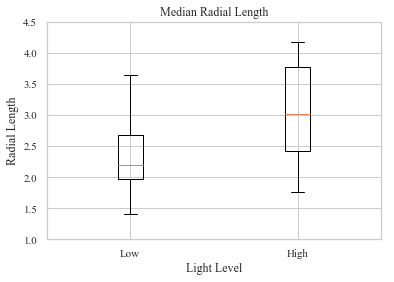

In [27]:
# Plotting the distribution of medians comparing light levels only considering the first trial
data_median_first = [median_radial_length_low_first, median_radial_length_high_first]
labels = ["Low", "High"]
fig, ax = plt.subplots()
ax.set_xlabel('Light Level')
ax.set_ylabel('Radial Length')
ax.set_ylim(1,4.5)
ax.boxplot(data_median_first)
ax.set_xticklabels(labels)
ax.set_title('Median Radial Length')



plt.show()
fig.savefig(out_path_fig_r + "\\" + "First_Median_Radial_length_box.png")

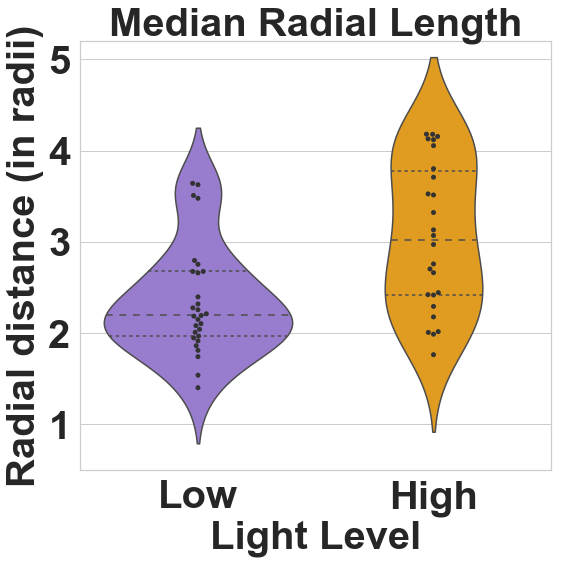

In [47]:
# Plotting the distribution of medians comparing light levels only considering the first trial
f, ax = plt.subplots(figsize=(8,8))
data_median_first = median_radial_length_low_first + median_radial_length_high_first
data_median_first
light = ["Low"]*29
light.extend(["High"]*26)
vdf_f = (pd.DataFrame({'Radial_distance_inradii': data_median_first, 'Light_Level': light}))

sns.violinplot(x = 'Light_Level', y= 'Radial_distance_inradii', data = vdf_f, inner="quart",
           palette=['mediumpurple','orange'])
sns.swarmplot(x='Light_Level', y ='Radial_distance_inradii', data = vdf_f,
            size=5, color="0.2", linewidth=0)
plt.title('Median Radial Length', size = 40, weight = 'bold')

plt.ylim(0.5,5.2)
plt.yticks([1,2,3,4,5], size = 40, weight = 'bold')
plt.xticks([0,1], size = 40, weight = 'bold')
plt.xlabel('Light Level', size = 40, weight = 'bold')
plt.ylabel('Radial distance (in radii)', size = 40, weight = 'bold')
plt.tight_layout()

plt.savefig(out_path_fig_r + "\\" + "First_Median_Radial_length_violin.png")

In [29]:
test_stat = np.mean(vdf_f.Radial_distance_inradii[vdf_f.Light_Level == "low"]) - np.mean(vdf_f.Radial_distance_inradii[vdf_f.Light_Level == "high"])
test_stat

nan

In [30]:
# resample
def null_perm_test():
    null_trt = np.random.choice(moth_data.Light_Level, replace = False, size = len(moth_data.Light_Level))
    null_test_stat = np.mean(moth_data.successful_visits[null_trt == "low"]) - np.mean(moth_data.successful_visits[null_trt == "high"]) 
    return(null_test_stat)

# resample 10000 times to generate sampling distribution under the null hypothesis
null_dist = np.array([null_perm_test() for ii in range(10000)])

NameError: name 'moth_data' is not defined

In [ ]:
plt.hist(null_dist, bins= 20)
plt.vlines(x = test_stat, ymin = 0, ymax =1000, color = "red")
plt.vlines(x = -test_stat, ymin = 0, ymax =1000, color = "red")
plt.show()

In [ ]:
pval = np.mean((null_dist >= test_stat) | (-test_stat >= null_dist) )
pval

In [ ]:
len(median_radial_length_low_last)

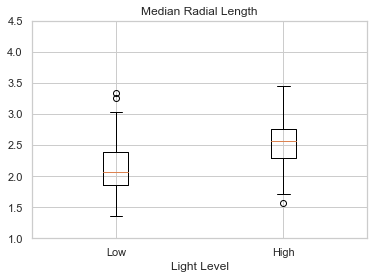

In [41]:
# Plotting the distribution of medians comparing light levels only considering the last trial
data_median_last = [median_radial_length_low_last, median_radial_length_high_last]
labels = ["Low", "High"]
fig, ax = plt.subplots()
ax.set_xlabel('Light Level')
# ax.set_ylabel('Radial Length')
ax.set_ylim(1,4.5)
ax.boxplot(data_median_last)
ax.set_xticklabels(labels)
ax.set_title('Median Radial Length')



plt.show()
fig.savefig(out_path_fig_r + "\\" + "Last_Median_Radial_length_box.png")

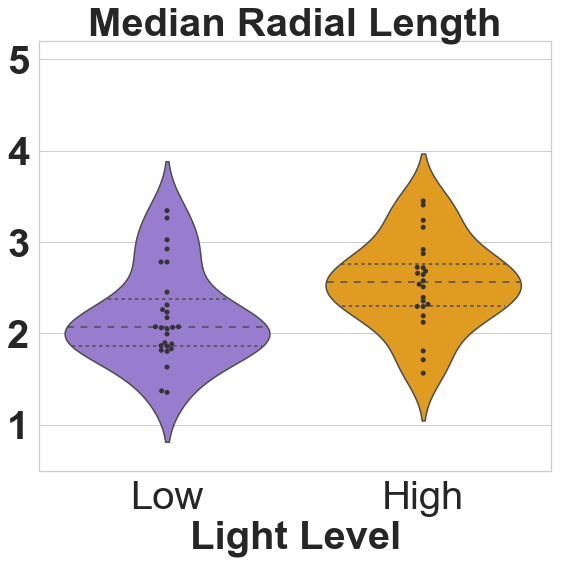

In [48]:
# Plotting the distribution of medians comparing light levels only considering the last trial
f, ax = plt.subplots(figsize=(8, 8))

data_median_last = median_radial_length_low_last + median_radial_length_high_last
light_l = ["Low"]*27
light_l.extend(["High"]*24)
vdf_l = (pd.DataFrame({'Radial distance (in radii)': data_median_last, 'Light Level': light_l}))

sns.violinplot(x='Light Level', y ='Radial distance (in radii)', data = vdf_l, inner="quart",
           palette=['mediumpurple','orange'])
sns.swarmplot(x='Light Level', y ='Radial distance (in radii)', data = vdf_l,
            size=5, color="0.2", linewidth=0)
plt.title('Median Radial Length', size = 40, weight = 'bold')

plt.ylim(0.5,5.2)
plt.yticks([1,2,3,4,5], size = 40, weight = 'bold')
plt.xticks([0,1], size = 40)
plt.xlabel('Light Level', size = 40, weight = 'bold')
plt.ylabel('') 
plt.tight_layout()

plt.savefig(out_path_fig_r + "\\" + "Last_Median_Radial_length_violin.png")

In [ ]:
# # the Welch's T-test assumes the distributions are normal, whereas the ks test makes no assumptions
# # Testing significant differences between the population of means for each light level
# sc.stats.ks_2samp(mean_radial_length_low, mean_radial_length_high)

In [ ]:
# # the Welch's T-test assumes the distributions are normal, whereas the ks test makes no assumptions
# # Testing significant differences between the population of means for each light level
# sc.stats.ks_2samp(mean_radial_length_low, mean_radial_length_high)

In [ ]:
# # Testing significant differences between the population of medians for each light level considering all trials
# sc.stats.ks_2samp(median_radial_length_low, median_radial_length_high)

In [ ]:
# # Testing significant differences between the population of medians for each light level considering all trials
# sc.stats.ks_2samp(median_radial_length_low, median_radial_length_high)

In [ ]:
# Testing significant differences between the population of medians for each light level only considering the first trial
sc.stats.ks_2samp(median_radial_length_low_first, median_radial_length_high_first)

In [ ]:
# Testing significant differences between the population of medians for each light level only considering the last trial
sc.stats.ks_2samp(median_radial_length_low_last, median_radial_length_high_last)

In [ ]:
# # Testing significant differences between the population of std for each light level
# sc.stats.ks_2samp(standard_deviation_low, standard_deviation_high)

In [ ]:
# # Testing significant differences between the population of iqr for each light level
# sc.stats.ks_2samp(iqr_low, iqr_high)

In [ ]:
# Testing significant differences between the population of iqr for each light level only considering the first trial
sc.stats.ks_2samp(iqr_lowl, iqr_highl)

In [ ]:
# # Testing significant differences between the population of iqr for each light level only considering the last trial
# sc.stats.ks_2samp(iqr_lowl, iqr_highl)

In [ ]:
# # Testing significant differences between the population of iqr for each light level only considering low light
# sc.stats.ks_2samp(iqr_lowf, iqr_lowl)

In [ ]:
# # standard deviation of the distribution of means for each light level
# np.std(mean_radial_length_low), np.std(mean_radial_length_high)

In [ ]:
# # iqr of the distribution of medians for each light level
# sc.stats.iqr(median_radial_length_low), sc.stats.iqr(median_radial_length_high)

In [ ]:
fig, ax = plt.subplots(1,2, sharex = True, sharey = True)
weights = np.ones_like(mean_radial_length_low)/float(len(mean_radial_length_low))
weights_hi = np.ones_like(mean_radial_length_high)/float(len(mean_radial_length_high))
ax[0].hist(mean_radial_length_low, weights=weights)
ax[0].set_xlim(1,4)
ax[1].hist(mean_radial_length_high, weights=weights_hi)

In [ ]:

ax = sns.violinplot(x="Visit", y="Radial_Length", hue = "lightLevel", data=FL_df, palette="Set2")
fig = ax.get_figure()

# fig.savefig(out_path_fig_r + "\\" + "All_Radial_length_violin.png")

In [ ]:

ax = sns.boxplot(x="Visit", y="Radial_Length", hue = "lightLevel", data=FL_df, palette="Set2")
fig = ax.get_figure()


# fig.savefig(out_path_fig_r + "\\" + "All_Radial_length_box.png")

In [ ]:

ax = sns.violinplot(x="Visit", y="Theta", hue = "lightLevel", data=FL_df, palette="Set1")
fig = ax.get_figure()

# fig.savefig(out_path_fig_t + "\\" + "All_Theta_violin.png")

In [ ]:

ax = sns.boxplot(x="Visit", y="Theta", hue = "lightLevel", data=FL_df, palette="Set1")
fig = ax.get_figure()
# out_path_fig_t = r"C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Motion_Analysis\Theta_Plot"
# fig.savefig(out_path_fig_t + "\\" + "All_Theta_box.png")

In [ ]:
#plot in terms of r
for name in nam_51:
    rad_first_visit = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('First'))].Radial_Length
    rad_last_visit = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('Last'))].Radial_Length
    
#     if len(list(rad_first_visit)) > 0:
    if any(list(~np.isnan(rad_first_visit))) == True & any(list(~np.isnan(rad_last_visit))) == True:
        fig, ax = plt.subplots(1, 2, sharex = True, sharey = True, figsize = (20,6), )
        ax[0].hist(rad_first_visit)
        ax[0].set_ylabel("Radius")
        ax[0].set_xlabel("First")
        ax[1].hist(rad_last_visit)
        ax[1].set_title(name)
        ax[1].set_xlabel("Last")
#         plt.savefig(r"C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Motion_Analysis\Radial_Plot" + "\\" + name + ".png")
    else:
        print(name)

In [ ]:
for name in nam_51: 

    theta_pulled_first = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('First'))].Theta * np.pi/180
    theta_pulled_last = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('Last'))].Theta * np.pi/180

    rad_first_visit = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('First'))].Radial_Length
    rad_last_visit = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('Last'))].Radial_Length
    
    

    if any(list(~np.isnan(rad_first_visit))) == True & any(list(~np.isnan(rad_last_visit))) == True:
        fig, ax = plt.subplots(1, 2, sharex = True, sharey = False, figsize = (20,6), subplot_kw=dict(polar=True))

        
        nbin =np.asarray([0, 30, 60,90,120,150,180,210,240,270,300,330])*np.pi/180.0
        ax[0].hist(theta_pulled_first, bins = nbin, density = True)
        ax[0].set_ylabel("Theta")
        ax[0].set_xlabel("First")
        ax[0].set_ylim(0,1)
        ax[1].hist(theta_pulled_last, bins = nbin, density = True)
        ax[1].set_title(name)
        ax[1].set_xlabel("Last")
        ax[1].set_ylim(0,1)

#         plt.savefig(r"C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Motion_Analysis\Theta_Plot\Rose" + "\\" + name + "_Hist.png")
    else:
        print(name)
    


In [ ]:
for name in nam_51: 

    theta_pulled_first = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('First'))].Theta * np.pi/180
    theta_pulled_last = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('Last'))].Theta * np.pi/180


    rad_first_visit = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('First'))].Radial_Length
    rad_last_visit = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('Last'))].Radial_Length
    

    if any(list(~np.isnan(rad_first_visit))) == True or any(list(~np.isnan(rad_last_visit))) == True:
        fig, ax = plt.subplots(1, 2, sharex = True, sharey = True, figsize = (20,6), subplot_kw=dict(polar=True))

        radif = np.ones(len(rad_first_visit))
        radil = np.ones(len(rad_last_visit))

        ax[0].scatter(theta_pulled_first,radif, alpha = 0.05)
        ax[0].set_ylabel("Theta")
        ax[0].set_xlabel("First")
        ax[1].scatter(theta_pulled_last,radil, alpha = 0.05)
        ax[1].set_title(name)
        ax[1].set_xlabel("Last")
#         plt.savefig(r"C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Motion_Analysis\Theta_Plot\Scatter" + "\\" + name + "_Scatter.png")
    else:
        print(name)
    


In [31]:
pca_path = r"C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Motion_Analysis\HeatMap\CSV"

In [32]:
# Generate some test data
# data = pd.DataFrame()

heatmap_FL = pd.DataFrame()
for name in first_heat_list:
    print(name)
    temp = FL_df[(FL_df.name == name)]
    x = temp.loc[temp.X_position.notnull(), 'X_position']
    y = temp.loc[temp.X_position.notnull(), 'Y_position']



    heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
    extent = [0, 648, 0, 488]
    
    hmv_FL = pd.Series(heatmap.flatten(),name=name)
    heatmap_FL = heatmap_FL.append(hmv_FL)
#     heatmap_FL.to_csv(pca_path + "\heatmap_vectors_FL.csv")
    plt.clf()
    plt.imshow(heatmap.T, extent=extent, origin='higher')
#     
#     plt.savefig(outpath_fig_ + "\\EntireTrial" + "\\" + name + "EntireTrial_HeatMap.png")
    plt.show()

NameError: name 'first_heat_list' is not defined

In [ ]:
dfd = pd.read_csv(pca_path + "\heatmap_vectors.csv")
dfd = dfd.set_index('Unnamed: 0')

In [ ]:
dfd

In [ ]:
# Generate some test data
outpath_fig_ = r"C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Motion_Analysis\HeatMap"
for name in nam_51[-3:-2]:
    
    x = dFrame[(dFrame.name == name) & (dFrame.X_position.notnull())].X_position 
    y = dFrame[(dFrame.name == name) & (dFrame.Y_position.notnull())].Y_position

    fig, ax = plt.subplots(1, 1, figsize = (6,6), subplot_kw=dict(polar=False))

    counts, xedges, yedges, im = ax.hist2d(x, y, bins=50)
    fig.colorbar(im)
    ax.set_ylim(0,488)
    ax.set_xlim(0,648)
    plt.gca().invert_yaxis()
    extent = [0, 648, 488, 0]
    
#     plt.clf()
#     plt.imshow(heatmap, extent=extent, origin='lower')
    
#     plt.savefig(outpath_fig_ + "\\" + name + "_heatMap_setbin.png")
    plt.show()

L0.1_c-3_m10


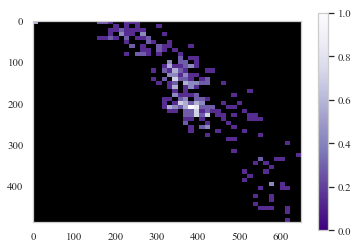

L0.1_c-3_m12


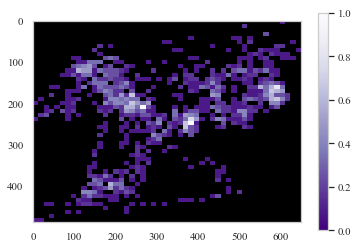

L0.1_c-3_m20


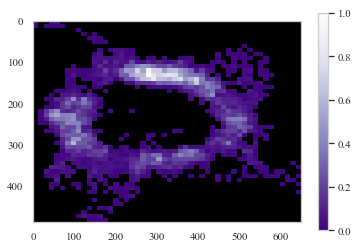

L0.1_c-3_m21


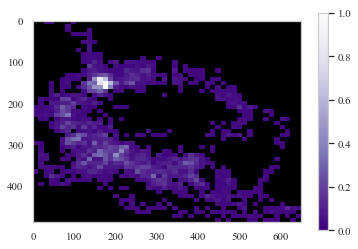

L0.1_c-3_m22


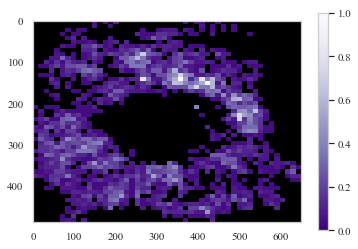

L0.1_c-3_m23


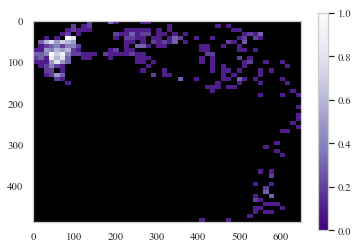

L0.1_c-3_m24


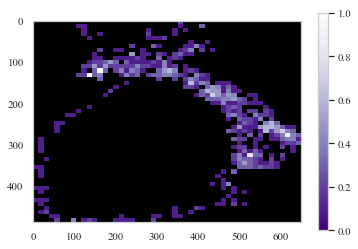

L0.1_c-3_m25


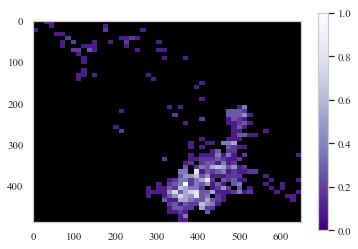

L0.1_c-3_m27


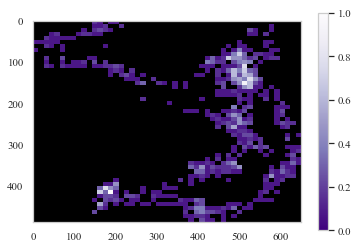

L0.1_c-3_m2


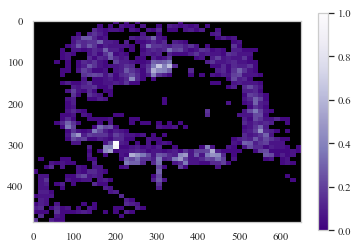

L0.1_c-3_m32


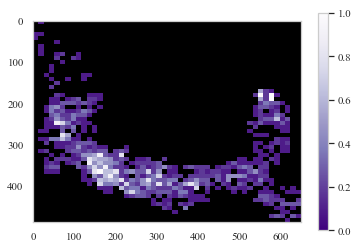

L0.1_c-3_m34


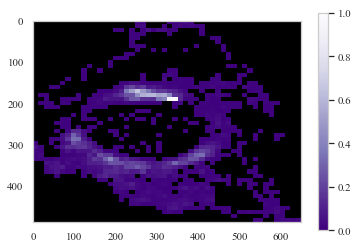

L0.1_c-3_m37


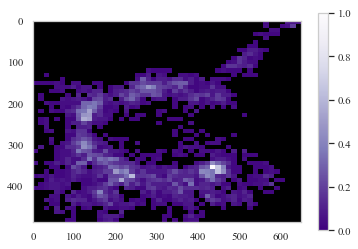

L0.1_c-3_m38


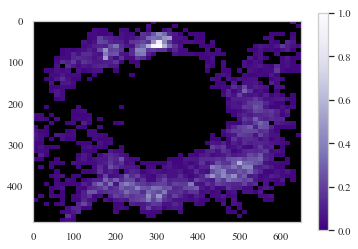

L0.1_c-3_m39


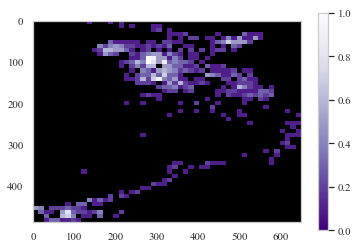

L0.1_c-3_m40


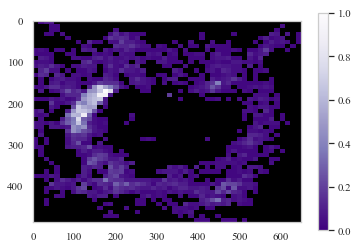

L0.1_c-3_m41


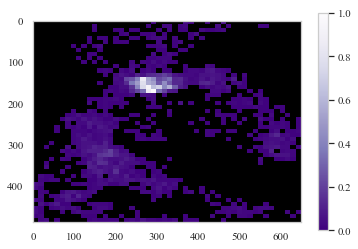

L0.1_c-3_m43


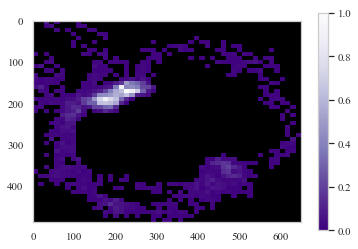

L0.1_c-3_m44


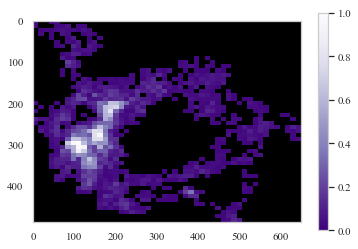

L0.1_c-3_m45


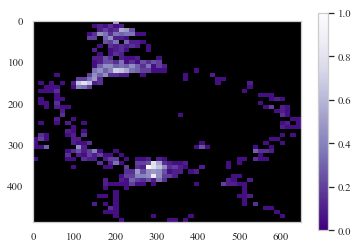

L0.1_c-3_m46


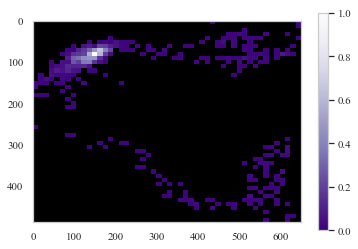

L0.1_c-3_m47


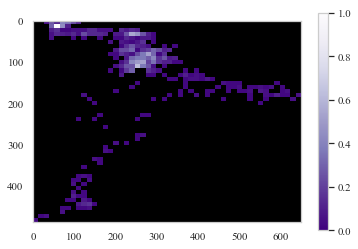

L0.1_c-3_m48


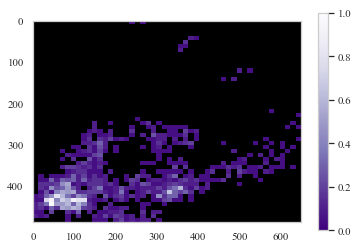

L0.1_c-3_m49


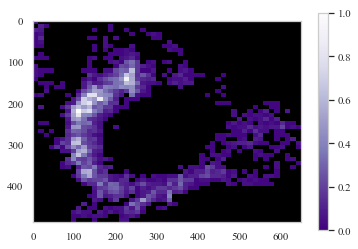

L0.1_c-3_m50


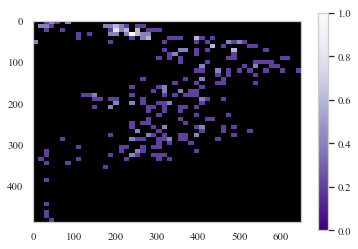

L0.1_c-3_m54


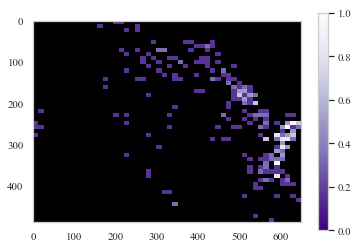

L0.1_c-3_m57


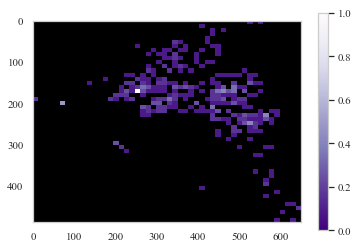

L0.1_c-3_m5


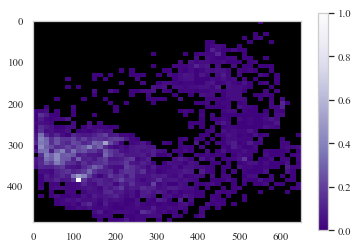

L0.1_c-3_m8


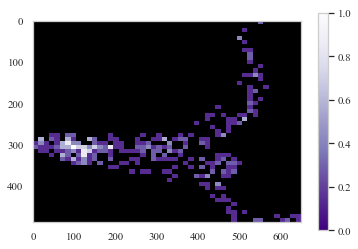

L50_c-3_m10


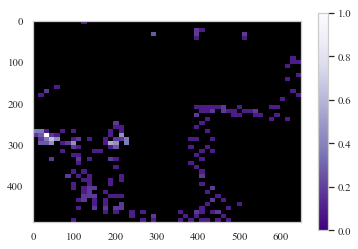

L50_c-3_m12


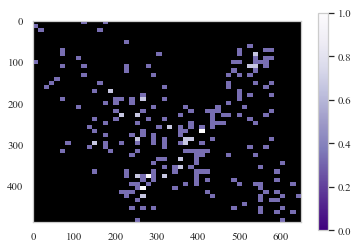

L50_c-3_m13


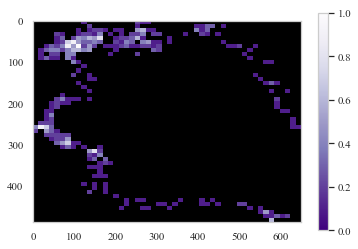

L50_c-3_m14


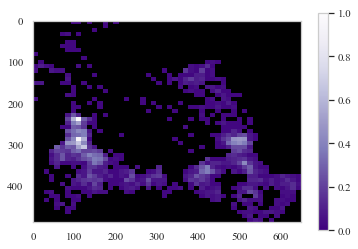

L50_c-3_m15


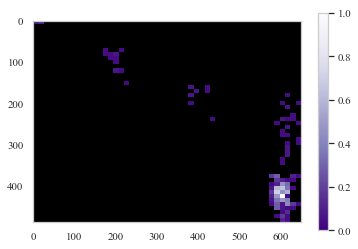

L50_c-3_m21


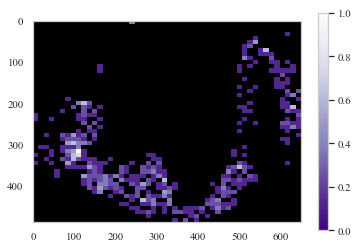

L50_c-3_m22


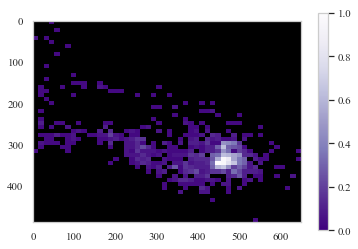

L50_c-3_m24


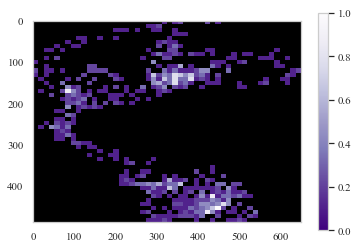

L50_c-3_m25


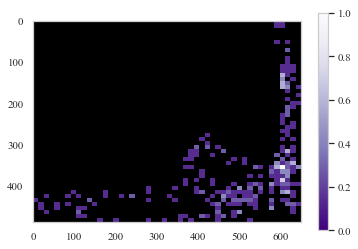

L50_c-3_m26


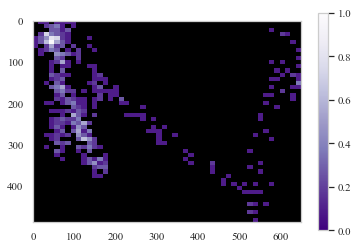

L50_c-3_m2


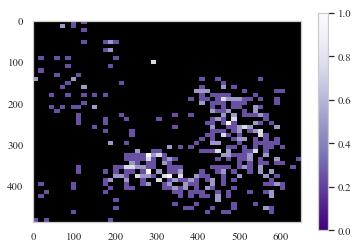

L50_c-3_m30


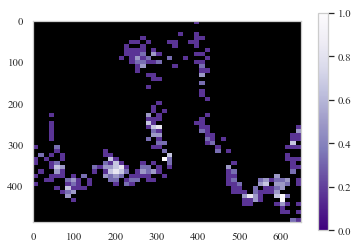

L50_c-3_m32


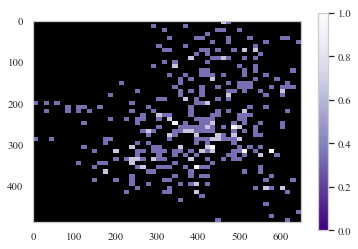

L50_c-3_m33


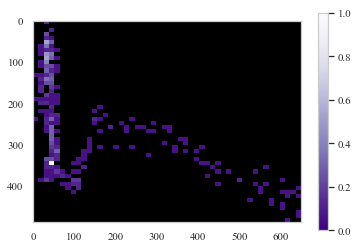

L50_c-3_m34


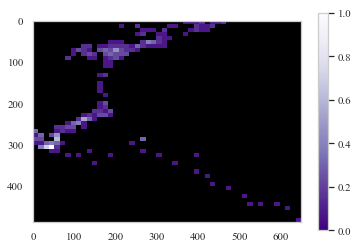

L50_c-3_m35


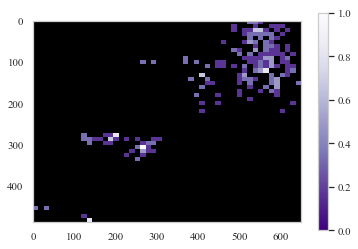

L50_c-3_m37


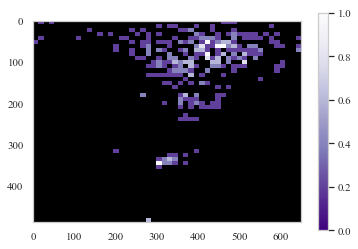

L50_c-3_m38


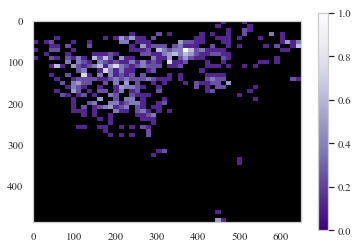

L50_c-3_m39


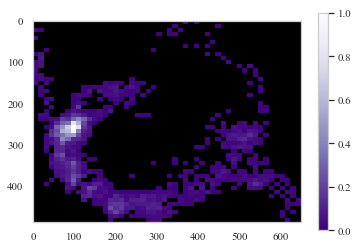

L50_c-3_m45


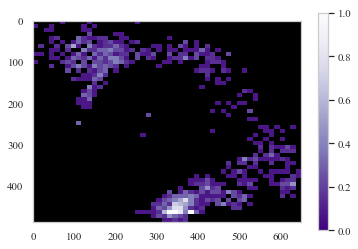

L50_c-3_m49


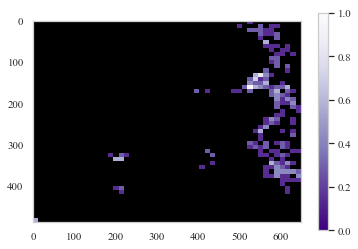

L50_c-3_m50


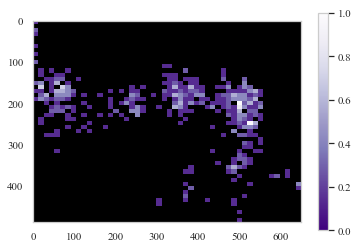

L50_c-3_m51


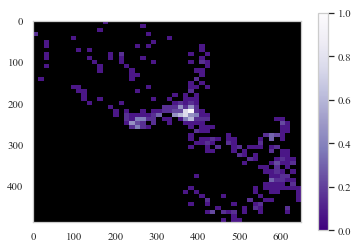

L50_c-3_m58


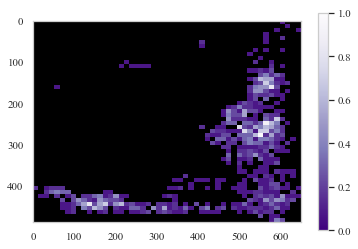

L50_c-3_m6


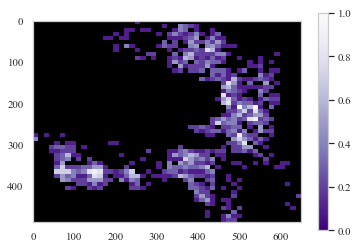

L50_c-3_m9


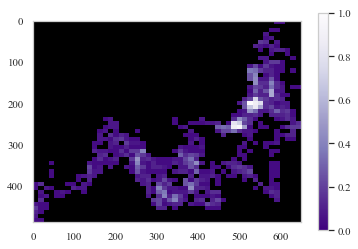

In [33]:
# Generate some test data
outpath_fig_first = r"C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Motion_Analysis\HeatMap\First"
dataf = pd.DataFrame()
first_heat_list = ['L0.1_c-3_m10', 'L0.1_c-3_m12', 'L0.1_c-3_m20', 'L0.1_c-3_m21',
       'L0.1_c-3_m22', 'L0.1_c-3_m23', 'L0.1_c-3_m24', 'L0.1_c-3_m25',
       'L0.1_c-3_m27', 'L0.1_c-3_m2', 'L0.1_c-3_m32', 'L0.1_c-3_m34',
       'L0.1_c-3_m37', 'L0.1_c-3_m38', 'L0.1_c-3_m39', 'L0.1_c-3_m40',
       'L0.1_c-3_m41', 'L0.1_c-3_m43', 'L0.1_c-3_m44', 'L0.1_c-3_m45',
       'L0.1_c-3_m46', 'L0.1_c-3_m47', 'L0.1_c-3_m48', 'L0.1_c-3_m49',
       'L0.1_c-3_m50', 'L0.1_c-3_m54', 'L0.1_c-3_m57', 'L0.1_c-3_m5',
       'L0.1_c-3_m8', 'L50_c-3_m10', 'L50_c-3_m12', 'L50_c-3_m13',
       'L50_c-3_m14', 'L50_c-3_m15', 'L50_c-3_m21', 'L50_c-3_m22',
       'L50_c-3_m24', 'L50_c-3_m25', 'L50_c-3_m26', 'L50_c-3_m2',
       'L50_c-3_m30', 'L50_c-3_m32', 'L50_c-3_m33', 'L50_c-3_m34',
       'L50_c-3_m35', 'L50_c-3_m37', 'L50_c-3_m38', 'L50_c-3_m39',
       'L50_c-3_m45', 'L50_c-3_m49', 'L50_c-3_m50', 'L50_c-3_m51',
       'L50_c-3_m58', 'L50_c-3_m6', 'L50_c-3_m9']

for name in first_heat_list:
    print(name)
    
    
    temp = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('First'))]
    x = temp.loc[temp.X_position.notnull(), 'X_position']
    y = temp.loc[temp.X_position.notnull(), 'Y_position']

   

    heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
    heatmap = heatmap/heatmap.max()
    extent = [0, 648, 488, 0]

    
    hmv_first = pd.Series(heatmap.flatten(),name=name)
    
    dataf = dataf.append(hmv_first)
    dataf.to_csv(pca_path + "\heatmap_vectors_first.csv")

    plt.clf()
    plt.grid(False)
    cmap = plt.cm.Purples_r
    cmap.set_under(color='black')
    im = plt.imshow(heatmap, extent=extent, origin='upper', cmap = cmap, vmin = 0.0000000000001)
    plt.colorbar(im)
#     plt.savefig(outpath_fig_first + "\\" + name + "FirstTrial_HeatMap.png")
    plt.show()

In [34]:
low = np.zeros((50,50))
high = np.zeros((50,50))
for name in first_heat_list:
    print(name)
    
    if name.startswith('L0.1'):
        temp = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('First'))]
        x = temp.loc[temp.X_position.notnull(), 'X_position']
        y = temp.loc[temp.X_position.notnull(), 'Y_position']



        heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
        heatmap = heatmap/heatmap.max()
        extent = [0, 648, 488, 0]


       

       

        low = low + heatmap 
    elif name.startswith('L50'):
        temp = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('First'))]
        x = temp.loc[temp.X_position.notnull(), 'X_position']
        y = temp.loc[temp.X_position.notnull(), 'Y_position']



        heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
        heatmap = heatmap/heatmap.max()
        extent = [0, 648, 488, 0]


        

        high = high + heatmap 


L0.1_c-3_m10
L0.1_c-3_m12
L0.1_c-3_m20
L0.1_c-3_m21
L0.1_c-3_m22
L0.1_c-3_m23
L0.1_c-3_m24
L0.1_c-3_m25
L0.1_c-3_m27
L0.1_c-3_m2
L0.1_c-3_m32
L0.1_c-3_m34
L0.1_c-3_m37
L0.1_c-3_m38
L0.1_c-3_m39
L0.1_c-3_m40
L0.1_c-3_m41
L0.1_c-3_m43
L0.1_c-3_m44
L0.1_c-3_m45
L0.1_c-3_m46
L0.1_c-3_m47
L0.1_c-3_m48
L0.1_c-3_m49
L0.1_c-3_m50
L0.1_c-3_m54
L0.1_c-3_m57
L0.1_c-3_m5
L0.1_c-3_m8
L50_c-3_m10
L50_c-3_m12
L50_c-3_m13
L50_c-3_m14
L50_c-3_m15
L50_c-3_m21
L50_c-3_m22
L50_c-3_m24
L50_c-3_m25
L50_c-3_m26
L50_c-3_m2
L50_c-3_m30
L50_c-3_m32
L50_c-3_m33
L50_c-3_m34
L50_c-3_m35
L50_c-3_m37
L50_c-3_m38
L50_c-3_m39
L50_c-3_m45
L50_c-3_m49
L50_c-3_m50
L50_c-3_m51
L50_c-3_m58
L50_c-3_m6
L50_c-3_m9


In [ ]:
heatmap.shape

In [35]:
low = low/low.max()
high = high/high.max()

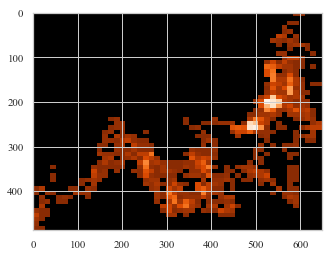

In [36]:
cmap = plt.cm.Oranges_r
cmap.set_under(color='black')
im = plt.imshow(heatmap, extent=extent, origin='upper', cmap = cmap, vmin = 0.0000000000001)

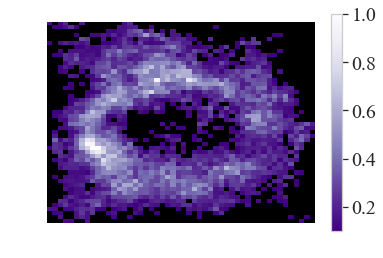

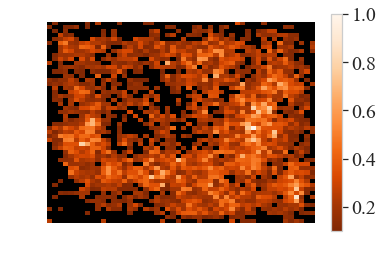

In [38]:
plt.clf()
plt.grid(False)
plt.tick_params(labelsize = 20)
cmap = plt.cm.Purples_r
cmap.set_under(color='black')
im = plt.imshow(low, extent=extent, origin='upper', cmap = cmap, vmin = 0.1 )
clr = plt.colorbar(im)
clr.ax.tick_params(labelsize=20)
plt.axis('off')
plt.savefig(outpath_fig_first + "\\Low_FirstTrial_HeatMap.png")
plt.show()
plt.clf()
plt.grid(False)
plt.tick_params(labelsize = 20)
cmap = plt.cm.Oranges_r
cmap.set_under(color='black')
im = plt.imshow(high, extent=extent, origin='upper', cmap = cmap, vmin = 0.1)
clr = plt.colorbar(im)
clr.ax.tick_params(labelsize=20)
plt.axis('off')
plt.savefig(outpath_fig_first + "\\High_FirstTrial_HeatMap.png")
plt.show()

In [ ]:
xedges

In [ ]:
yedges

In [ ]:
heatmap/heatmap.max()

In [ ]:
# Generate some test data
outpath_fig_last = r"C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Motion_Analysis\HeatMap\Last"
dataf = pd.DataFrame()
last_heat_list = ['L0.1_c-3_m10','L0.1_c-3_m12','L0.1_c-3_m20','L0.1_c-3_m21',
                  'L0.1_c-3_m22','L0.1_c-3_m23','L0.1_c-3_m25','L0.1_c-3_m27', 
'L0.1_c-3_m2', 'L0.1_c-3_m32','L0.1_c-3_m34','L0.1_c-3_m37','L0.1_c-3_m38','L0.1_c-3_m40','L0.1_c-3_m41','L0.1_c-3_m43',
'L0.1_c-3_m44','L0.1_c-3_m45','L0.1_c-3_m46','L0.1_c-3_m47','L0.1_c-3_m48','L0.1_c-3_m49','L0.1_c-3_m50','L0.1_c-3_m54',
'L0.1_c-3_m57','L0.1_c-3_m5','L0.1_c-3_m8','L50_c-3_m10','L50_c-3_m12','L50_c-3_m13','L50_c-3_m14','L50_c-3_m15','L50_c-3_m21',
'L50_c-3_m22','L50_c-3_m26','L50_c-3_m2','L50_c-3_m30','L50_c-3_m32','L50_c-3_m33','L50_c-3_m34','L50_c-3_m35','L50_c-3_m37', 
'L50_c-3_m38','L50_c-3_m39','L50_c-3_m45','L50_c-3_m6','L50_c-3_m9','L50_c-3_m49','L50_c-3_m50','L50_c-3_m51','L50_c-3_m58']

for name in last_heat_list:
    print(name)
    
    temp = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('Last'))]
    x = temp.loc[temp.X_position.notnull(), 'X_position']
    y = temp.loc[temp.X_position.notnull(), 'Y_position']

   

    heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
    heatmap = heatmap/heatmap.max()
    extent = [0, 648, 488, 0]

    
    hmv_first = pd.Series(heatmap.flatten(),name=name)
    
    dataf = dataf.append(hmv_first)
    dataf.to_csv(pca_path + "\heatmap_vectors_last.csv")

    plt.clf()
    plt.grid(False)
    im = plt.imshow(heatmap, extent=extent, origin='upper')
    plt.colorbar(im)
    plt.savefig(outpath_fig_last + "\\" + name + "LastTrial_HeatMap.png")
    plt.show()

In [ ]:
len(first_heat_list), len(last_heat_list)

In [ ]:
low = np.zeros((50,50))
high = np.zeros((50,50))
for name in last_heat_list:
    print(name)
    
    if name.startswith('L0.1'):
        temp = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('Last'))]
        x = temp.loc[temp.X_position.notnull(), 'X_position']
        y = temp.loc[temp.X_position.notnull(), 'Y_position']



        heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
        heatmap = heatmap/heatmap.max()
        extent = [0, 648, 488, 0]


        

        low = low + heatmap 
    elif name.startswith('L50'):
        temp = FL_df[(FL_df.name == name) & (FL_df.Visit.str.contains('Last'))]
        x = temp.loc[temp.X_position.notnull(), 'X_position']
        y = temp.loc[temp.X_position.notnull(), 'Y_position']



        heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
        heatmap = heatmap/heatmap.max()
        extent = [0, 648, 488, 0]


        

        high = high + heatmap 
        
low = low/low.max()
high = high/high.max()
plt.clf()
plt.grid(False)
plt.tick_params(labelsize = 20)
im = plt.imshow(low, extent=extent, origin='upper')
clr = plt.colorbar(im)
clr.ax.tick_params(labelsize=20)
plt.savefig(outpath_fig_last + "\\Low_LastTrial_HeatMap.png")
plt.show()
plt.clf()
plt.grid(False)
plt.tick_params(labelsize = 20)
im = plt.imshow(high, extent=extent, origin='upper')
clr = plt.colorbar(im)
clr.ax.tick_params(labelsize=20)
plt.savefig(outpath_fig_last + "\\High_LastTrial_HeatMap.png")
plt.show()